In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyesg 
from evaluation import fanchart

In [11]:
acwi = pd.read_csv('acwi_25.08.23.csv')
acwi.index = pd.DatetimeIndex(acwi['Date'])

<AxesSubplot:xlabel='Date'>

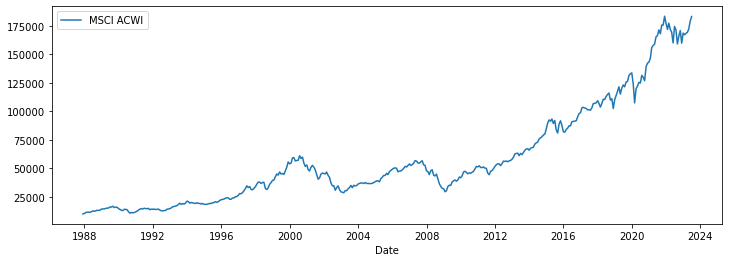

In [19]:
fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(data=acwi,ax=ax)

In [23]:
acwi_returns = np.log(acwi['MSCI ACWI']/acwi['MSCI ACWI'].shift(1)).loc['1994-01-01':]
acwi_returns.describe()

count    355.000000
mean       0.006299
std        0.042396
min       -0.155028
25%       -0.013693
50%        0.011209
75%        0.033424
max        0.114884
Name: MSCI ACWI, dtype: float64

In [28]:
annualized_mean = acwi_returns.mean() * 12
annualized_std = acwi_returns.std() * np.sqrt(12)
print(annualized_mean)
print(annualized_std)

0.07558256759399751
0.14686330930066238


In [34]:
ann_ret = np.log(acwi['MSCI ACWI']/acwi['MSCI ACWI'].shift(12)).loc['1994-01-01':]
ann_ret.describe()

count    355.000000
mean       0.076830
std        0.174893
min       -0.492778
25%        0.003215
50%        0.105590
75%        0.189558
max        0.433882
Name: MSCI ACWI, dtype: float64

In [29]:
model = pyesg.GeometricBrownianMotion(mu=0.073,sigma=0.15)
scenarios = model.scenarios(100,1,600,20)

In [35]:
np.savetxt('acwi_scenarios.css', scenarios)

ValueError: operands could not be broadcast together with shapes (181,) (21,) 

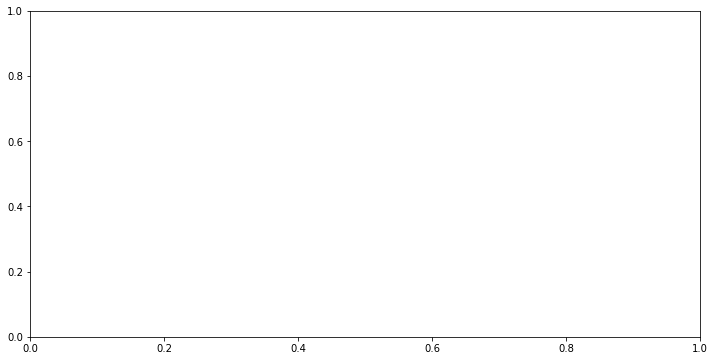

In [32]:
perc = np.percentile(scenarios,[1,5,25,50,75,95,99],axis=0)
fanchart(None, perc)